In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



# make_blobs(): 분류용 가상 데이서 생성 함수
## 등방성 가우시안 정규분포를 이용 가상 데이터 생성

- 인수
 - n_samples: 표본 데이터 수, d=100
 - n_features: 독립 변수의 수. d=2
 - centers: 정수 또는[n_centers, n_features]크기의 배열, 생성할 클러스터의 수 혹은 중심. d=3
 - cluster_std:클러스터의 표준편차. d=1.0
 - center_box: 생성랄 클러스터의 바운딩 박스(bounding box), ㅇ(-10.0,10.0)
- 반환값:
 - X: 독립 변수, [n_sameples, n_features]크기의 배열
 - y: 종속 변수, [n_samples] 크기의 배열


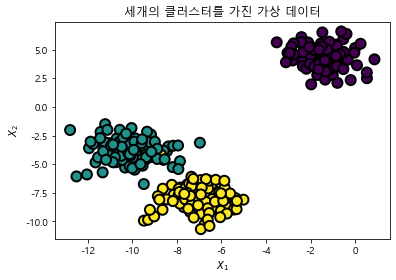

In [2]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("세개의 클러스터를 가진 가상 데이터")
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()


In [3]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

print(X)
print(y)

[[ 9.24222414  1.36290933]
 [ 9.17124955  3.52485535]
 [ 8.84264231  1.29144424]
 [ 9.13144602  0.15235637]
 [ 8.66686663  0.93996493]
 [ 8.76869749  1.19960487]
 [10.45227689  1.14179259]
 [ 9.4874227   3.93018752]
 [ 9.55834394  4.10909742]
 [10.03578098  4.41764995]
 [ 9.70226758  0.96771277]
 [ 9.53292197  5.29136138]
 [ 8.90512626  4.03222184]
 [ 8.91604215  5.30752241]
 [ 9.42054325  0.3401709 ]
 [ 9.55313298  1.11077156]
 [ 9.01498386  1.21587064]
 [ 8.84910095  0.97186135]
 [ 9.73389792  0.02420705]
 [ 9.1891148   1.54564628]
 [ 9.27524446  1.34568829]
 [ 9.85130417  4.30586485]
 [ 9.0167434   1.24393257]
 [ 9.70857663  4.44654264]
 [10.69197928  4.47249157]
 [ 9.4779887   4.39064298]
 [ 9.2024951   1.34290093]
 [10.14364725  4.26904052]
 [ 9.00096813  4.51145554]
 [ 9.6022578   3.81543147]
 [ 8.78780476  1.36356316]
 [ 9.9310365   4.5579437 ]
 [10.38453221  1.40206546]
 [ 8.76218865  1.12014356]
 [ 9.88910809  4.20871461]
 [10.08959651  3.97249761]
 [ 8.9815029   4.43675221]
 

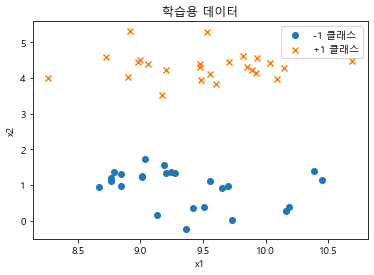

In [4]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

- C: 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된 정도
 - SVM모델이 오류를 어느정도 허용할 것인지 파라미터 C를 통해 지정
 - C값이 클수록 하드마진(오류 허용 안함), 작을수록 소프트마진(오류를 허용)이다.
- gamma: 결정 경계를 얼마나 유연하게 그을 것인지 정해주는 역할
 - gamma값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 된다. 오버피팅을 초래
 - gamma값을 낮추면 학습 데이터에 별로 의존하지 않고 결정 경계를 직선에 가깝게 긋게된다. 언더피팅 초래
 - C와 Gamma를 지나치게 높게 잡는다면 오버피팅이 될수있다.
- 커널(kernel): 판별 경계를 찾기위한 내적 함수. (linear, poly, rbf, sigmoid, precomputed) d=rbf

In [5]:
from sklearn.svm import SVC
# 슬랙변수(c) : 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된 정도를 나타낸다.

# 커널(kernel) : 판별 경계를 찾기 위핚 내적 함수
model = SVC(kernel='linear', C=1e10).fit(X, y)
model


SVC(C=10000000000.0, kernel='linear')

# SCV를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다.
 - n_support_: 각 클래스의 서포트 백터의 개수
 - support_: 각 클래스의 서포트 백터의 인덱스
 - support_vectors_: 각 클래스의 서포트의 x값
 - coef_: 기울기
 - intercept_: 절편
 - dual_coef_: 각 원소가 ai'yi로 이루언지 벡터. 음의 계수와 양의 계수를 나타낸다.

In [6]:
model.n_support_

array([1, 1])

In [7]:
model.support_

array([42,  1])

In [8]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [9]:
print(model.coef_, model.intercept_)

[[0.08171082 1.10091404]] [-3.62995208]


In [10]:
import numpy as np
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)


In [11]:
# x, y_는 배열의 인덱스, value는 인덱스 위치의 값
a = np.array([[1,2],[3,4],[5,6]])
for (x, y_), value in np.ndenumerate(a):
    print((x, y_), value)

(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4
(2, 0) 5
(2, 1) 6


In [12]:
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    #print(p)
    Z[i, j] = p[0]

levels = [-1, 0, 1]


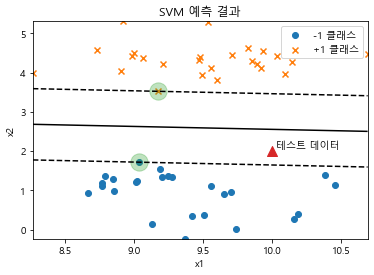

In [13]:
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)
x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")
plt.show()


In [14]:
x_new = [10, 2]
model.decision_function([x_new])

model.coef_.dot(x_new) + model.intercept_


array([-0.61101582])

In [15]:
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [16]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + model.intercept_

array([-0.61101582])

# iris

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
iris = load_iris()

# 0, 1
X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=1)

svm = SVC(kernel="linear", C=1e10)
svm.fit(X_train, y_train)


SVC(C=10000000000.0, kernel='linear')

In [18]:
pred_y = svm.predict(X_test)
confusion_matrix(pred_y, y_test)


array([[14,  0],
       [ 0, 16]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

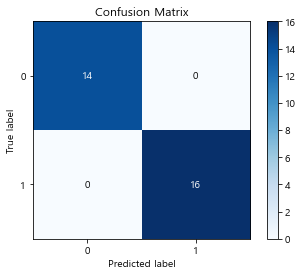

In [19]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_y)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

params = {
    "C":[0.0001, 0.001, 0.01, 0.1, 10, 25, 50, 100],
    "gamma":[0.0001, 0.001, 0.01, 0.1, 10, 25, ],
    "kernel":["linear", "poly", "rbf", "sigmoid"]
}

model = SVC()
cv = KFold(n_splits=5, shuffle=True) #, random_state=42)
gs = GridSearchCV(model,       # estimator
                  param_grid=params,
                  cv= 2,
                  scoring=None, n_jobs=-1,refit=True)
gs.fit(X_train, y_train)

model = gs.best_estimator_
print("train_score : {} ".format(model.score(X_train, y_train)))
print("test_score : {} ".format(model.score(X_test, y_test)))
print(f"{gs.best_score_}\n")
print(f"{gs.best_params_}\n")
print(f"{gs.best_score_}\n")

train_score : 1.0 
test_score : 1.0 
1.0

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

1.0



In [21]:
import numpy as np

x, y = np.mgrid[0:3, 0:5]
print(x)
print('-----------')
print(y)
print('===========')
xx, yy = np.mgrid[-1:1:3j, -1:1:5j]  # j 는 만들 갯수
print(xx)
print('-----------')
print(yy)
print('===========')


[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]]
-----------
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]]
-----------
[[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]


In [22]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20


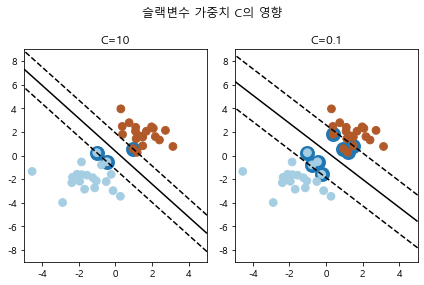

In [23]:
plotnum = 1

for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5) # 개수 생략시 d=50
    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()
    

# Scikit_Learn SVM 얼굴인식

In [24]:
# 얼굴 이미지 인식
# 총 40명이 각각 10장의 조금씩 다른 표정이나 모습으로 찍은 이미지 데이터이다.
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()


In [25]:
print(faces.keys())
print(faces.data.shape)
print(faces.images.shape)
print(faces.target)
print(faces.DESCR)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)
(400, 64, 64)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 

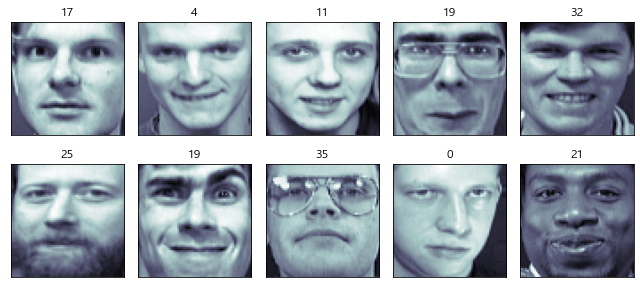

In [26]:
# 이미지 출력
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()


In [27]:
# 랚덤하게 뽑은 이미지
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)


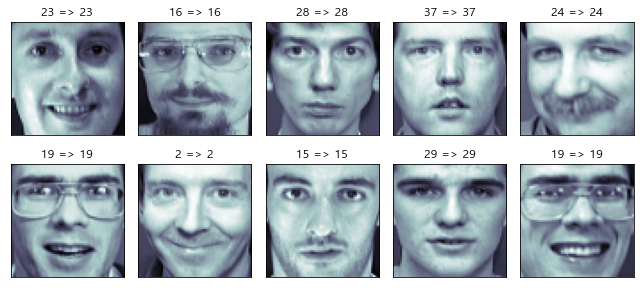

In [28]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone) # reshape 1차원 구조를 2차원 구조(image)로
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" % (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()


In [29]:
# 랜덤하게 뽑은 이미지의 예측
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [30]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    

# 비만도테스트 - SVC

In [31]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd


# eXample code

In [45]:
from sklearn.svm import SVC

bmi = pd.read_csv('bmi.csv')

# 정규화 방법 1
label = bmi['label']
# w = bmi['weight'] / 100
# h = bmi['height'] / 200
# wh = pd.concat([w, h], axis=1)

# 방법 2 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
wh = sc.fit_transform(bmi.iloc[:,:-1])

data_train, data_test, label_train, label_test = train_test_split(wh, label, random_state=0)
print(data_train.shape, data_test.shape)

clf = SVC()
clf.fit(data_train, label_train)

predict = clf.predict(data_test)
predict

ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print(f"정답률 = {ac_score}")
print(f"리포트 =\n {cl_report}")


(15000, 2) (5000, 2)
정답률 = 0.9974
리포트 =
               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1807
      normal       0.99      1.00      1.00      1566
        thin       1.00      1.00      1.00      1627

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

estimator = SVC()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
parameters = {'C': [0.001, 0.01, 0.1, 0, 1, 10],
              'gamma':[0.001, 0.01, 0.1, 0, 1, 10],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
model_GV = GridSearchCV(estimator = estimator,
                        param_grid = params,
                        cv=cv, vervose=-1, n_jobs=-1, refit=True)
model_GV.fit(data_train, label_train)

print(f"{model_GV.best_score_}\n")
print(f"{model_GV.best_params_}\n")
print(f"{model_GV.best_score_}\n")

In [32]:
bmi = pd.read_csv('bmi.csv')

bmi.notnull().count()
bmi.head()

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat


In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bmi['label'] = le.fit_transform(bmi['label'])
bmi.head()

,height,weight,label
0,142,62,0
1,142,73,0
2,177,61,1
3,187,48,2
4,153,60,0


In [34]:
bmi.iloc[:,-1:]

,label
0,0
1,0
2,1
3,2
4,0
...,...
19995,0
19996,1
19997,2
19998,2


In [35]:
# 데이터 분리, 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bmi.iloc[:, :2], bmi.iloc[:,-1:], test_size=0.3, random_state=0)
from sklearn.svm import SVC


In [36]:
svm = SVC(kernel="linear", C=10)
svm.fit(X_train, y_train)


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, kernel='linear')

In [37]:
from sklearn.metrics import confusion_matrix

pred_y = svm.predict(X_test)
confusion_matrix(pred_y, y_test)


array([[2172,   27,    0],
       [  22, 1801,   30],
       [   0,   28, 1920]], dtype=int64)

In [41]:
# 예측
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print(y_pred)
print(list(y_test))
print(f"정확도 : {metrics.accuracy_score(y_test, y_pred)}")


[0 0 0 ... 0 1 2]
['label']
정확도 : 0.9821666666666666


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

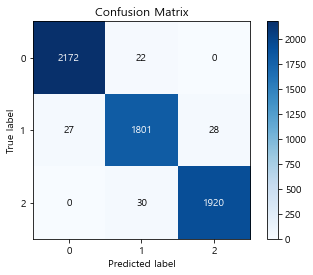

In [38]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_y)


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

params = {
    "C":[0.1, 1, 10, 20, 30],
    "gamma":[0.01, 0.1, 1, 10],
    "kernel":["linear", "poly", "rbf", "sigmoid"]
}

model = SVC()
cv = KFold(n_splits=5, shuffle=True) #, random_state=42)


In [40]:
gs = GridSearchCV(model,       # estimator
                  param_grid=params,
                  cv=2,
                  scoring=None, n_jobs=-1) #,refit=True)
gs.fit(X_train, y_train)


IndentationError: unexpected indent (Temp/ipykernel_4636/376731628.py, line 2)

In [42]:
model = gs.best_estimator_
print(f"train_score : {model.score(X_train, y_train)}")
print(f"test_score : {model.score(X_test, y_test)}")
print(f"{gs.best_score_}\n")
print(f"{gs.best_params_}\n")
print(f"{gs.best_score_}\n")


train_score : 0.36628571428571427
test_score : 0.36566666666666664
1.0

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

1.0



c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# 그래프 그리기

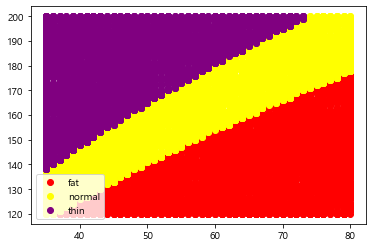

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col=2)

# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 서브 플롯 전용 - 지정핚 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend() 
plt.savefig("bmi-test.png")
plt.show()
